In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['species'] = iris.target
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


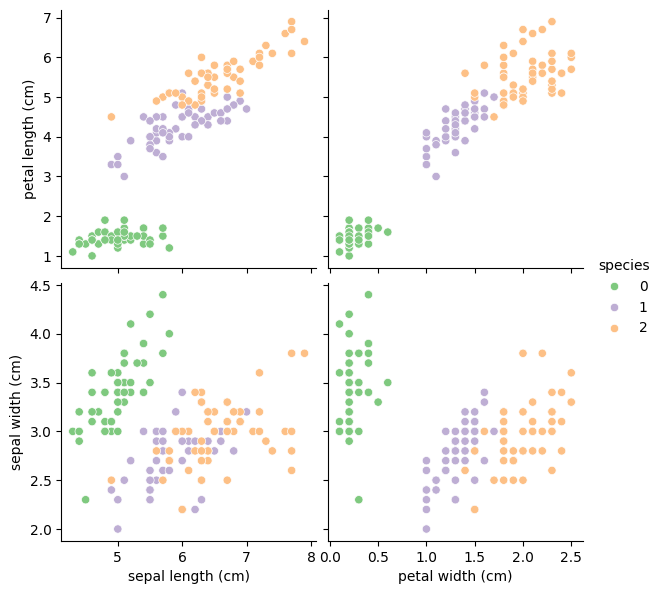

In [5]:
sns.pairplot(iris_pd, hue='species', height=3, x_vars=['sepal length (cm)', 'petal width (cm)'], y_vars=['petal length (cm)', 'sepal width (cm)'], palette='Accent')

In [7]:
iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [8]:
def get_pca_data(ss_data, n_components=2) :
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)
    return pca.transform(ss_data), pca

In [11]:
iris_pca, pca = get_pca_data(iris_ss, n_components=2)
iris_pca.shape

(150, 2)

In [12]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [13]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [14]:
def get_pd_from_pca(pca_data, cols=['pca_component_1', 'pca_component_2']) :
    return pd.DataFrame(pca_data, columns=cols)

In [15]:
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head(3)

,pca_component_1,pca_component_2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


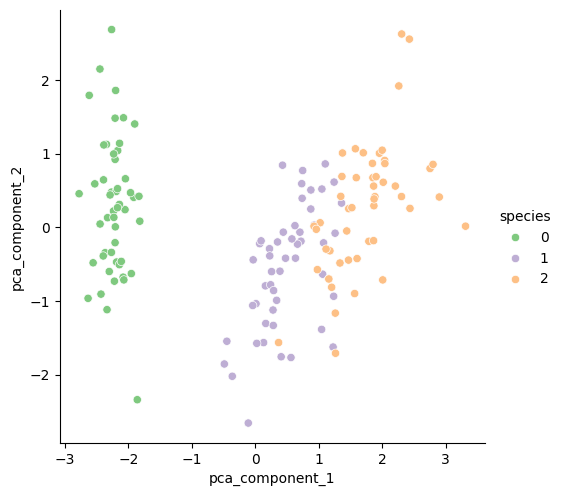

In [18]:
sns.pairplot(iris_pd_pca, hue='species', height=5, x_vars=['pca_component_1'], y_vars= ['pca_component_2'], palette='Accent')

In [19]:
def print_variance_ratio(pca) :
    print('variance_ratio : ', pca.explained_variance_ratio_)
    print('sum of variance_ratio : ', np.sum(pca.explained_variance_ratio_))

print_variance_ratio(pca)

variance_ratio :  [0.72962445 0.22850762]
sum of variance_ratio :  0.9581320720000165


In [25]:
def rf_scores(x, y, cv=5) :
    rf = RandomForestClassifier(random_state=5, n_estimators=100)
    scores_rf = cross_val_score(rf, x, y, scoring='accuracy', cv=cv)

    print('Score : ', np.mean(scores_rf))

rf_scores(iris_ss, iris.target)

Score :  0.96


In [26]:
pca_x = iris_pd_pca[['pca_component_1', 'pca_component_2']]
rf_scores(pca_x, iris.target)

Score :  0.8933333333333333


# wine

In [27]:
red_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/main/data/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/main/data/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')
red_wine['color']=1.
white_wine['color']=0.
wine = pd.concat([red_wine, white_wine])

In [30]:
wine_y = wine['color']
wine_x = wine.drop(['color'], axis=1)
wine_ss = StandardScaler().fit_transform(wine_x)

In [32]:
pca_wine, pca = get_pca_data(wine_ss, n_components=2)
print_variance_ratio(pca)

variance_ratio :  [0.25346226 0.22082117]
sum of variance_ratio :  0.47428342743236185


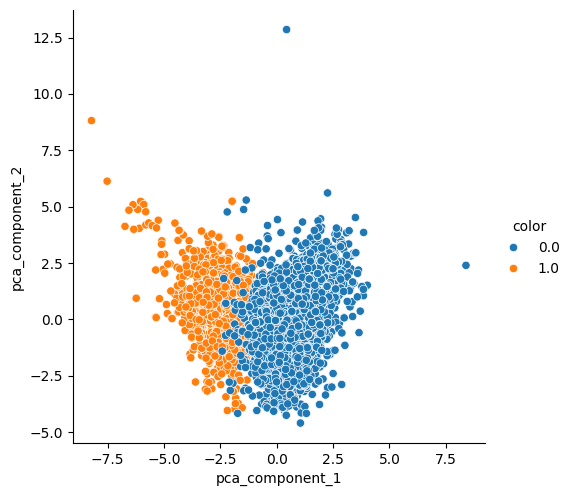

In [33]:
pca_columns = ['pca_component_1', 'pca_component_2']
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_columns)
pca_wine_pd['color'] = wine_y.values
sns.pairplot(pca_wine_pd, hue='color', height=5, x_vars=['pca_component_1'], y_vars=['pca_component_2']);

In [34]:
rf_scores(wine_ss, wine_y)

Score :  0.9933815360928525


In [35]:
pca_x = pca_wine_pd[['pca_component_1', 'pca_component_2']]
rf_scores(pca_x, wine_y)

Score :  0.981837508142358


In [38]:
pca_wine, pca = get_pca_data(wine_ss, n_components=3)
print_variance_ratio(pca)
cols = ['pca_1', 'pca_2', 'pca_3']
pca_wine_pd = get_pd_from_pca(pca_wine, cols=cols)
pca_x = pca_wine_pd[cols]
rf_scores(pca_x, wine_y)

variance_ratio :  [0.25346226 0.22082117 0.13679223]
sum of variance_ratio :  0.6110756621838704
Score :  0.9832236631728548


In [39]:
pca_wine_plot = pca_x
pca_wine_plot['color'] = wine_y.values
pca_wine_plot.head()

,pca_1,pca_2,pca_3,color
0,-3.348438,0.568926,-2.727386,1.0
1,-3.228595,1.197335,-1.998904,1.0
2,-3.237468,0.952580,-1.746578,1.0
3,-1.672561,1.600583,2.856552,1.0
4,-3.348438,0.568926,-2.727386,1.0


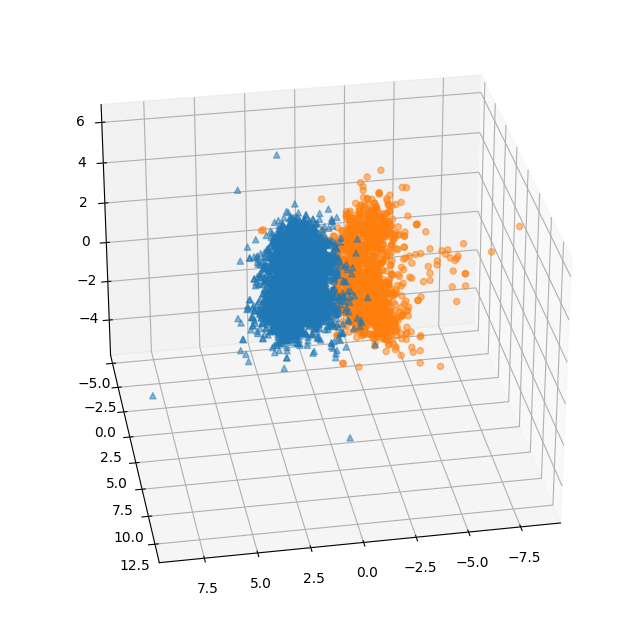

In [41]:
from mpl_toolkits.mplot3d import Axes3D

markers = ['^', 'o']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for i, marker in enumerate(markers) :
    x_axis_data = pca_wine_plot[pca_wine_plot['color']==i]['pca_1']
    y_axis_data = pca_wine_plot[pca_wine_plot['color']==i]['pca_2']
    z_axis_data = pca_wine_plot[pca_wine_plot['color']==i]['pca_3']

    ax.scatter(x_axis_data, y_axis_data, z_axis_data, s=20, alpha=0.5, marker=marker)

ax.view_init(30, 80)
plt.show()

In [43]:
import plotly.express as px

fig = px.scatter_3d(pca_wine_plot, x='pca_1', y='pca_2', z='pca_3', color='color', symbol='color', opacity=0.4)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()